<a href="https://colab.research.google.com/github/KushalChakraborty1995/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_By_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

$\color{green}{\text{NETFLIX MOVIES AND TV SHOWS CLUSTERING}}$



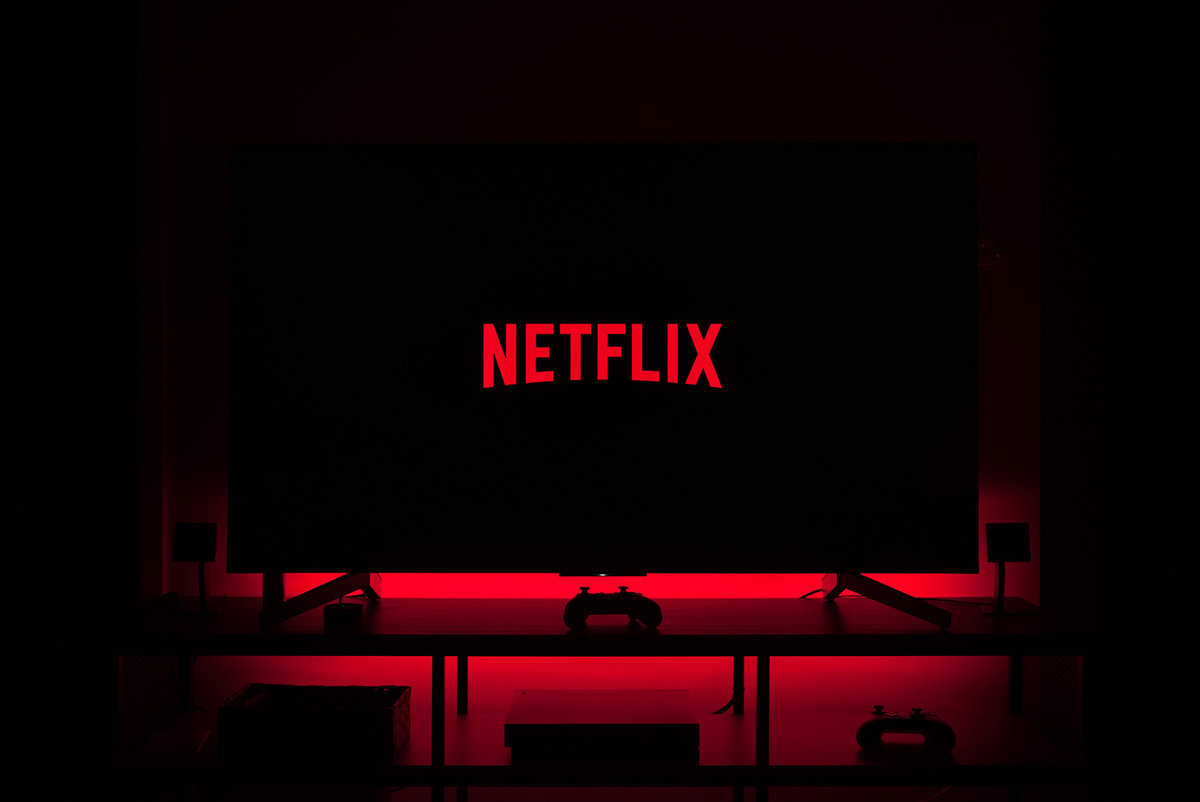

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  $\color{red}{\text{Kushal Chakraborty}}$


# **Project Summary -**

**Netflix, Inc.** is an American subscription video on-demand over-the-top streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.


In this project,i have done following things:-

* Exploratory Data Analysis.

* Understanding what type content is available in different countries.

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.


# **GitHub Link -**

https://github.com/KushalChakraborty1995/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.** 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
#Mounting Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
file_path='/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [5]:
#Reading the csv file
df=pd.read_csv(file_path)

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [10]:
print(f'We have {df.duplicated().sum()} duplicated value in the Dataset. Hurrahh!!!')

We have 0 duplicated value in the Dataset. Hurrahh!!!


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

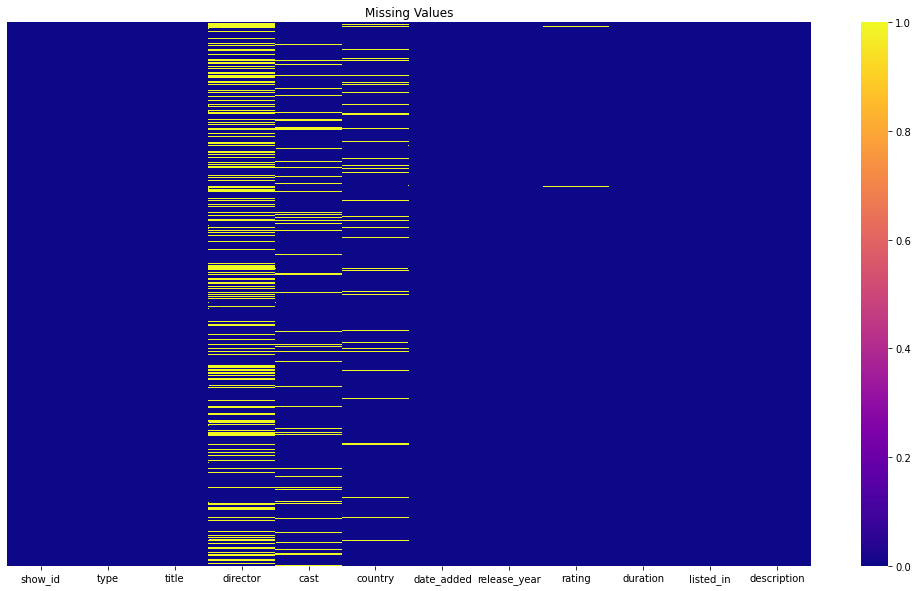

In [12]:
# Visualizing the missing values

plt.figure(figsize=(18,10))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title('Missing Values')

### What did you know about your dataset?

**There are null/missing values in director, cast, country, date_added, rating columns.**

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast**: Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration**: Total Duration - in minutes or number of seasons

* **listed_in** : Genere

* **description**: The Summary description

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [16]:
# Checking Unique Values for each variable.
variables_df = df.columns.to_list()

In [17]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of show_id are: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
The Unique Values of type are: ['TV Show' 'Movie']
The Unique Values of title are: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
The Unique Values of director are: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
The Unique Values of cast are: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
The Unique Va

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['country'].replace(np.nan, 'United States',inplace  = True)
df['cast'].replace(np.nan, 'Missing info',inplace  = True)
df['director'].replace(np.nan, "Unknown",inplace  = True)

df = df[df['date_added'].notna()]

### What all manipulations have you done and insights you found?

* **Rating & Country** - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

* **Cast**  - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA.

* **Date**  - there are few missing values for date column. so, lets drop missing value rows.

* **Director** - Director column has more then 30% null values ,I replace those missing values with the text "Unknown".

In [19]:
# Readjusting date added column and adding new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

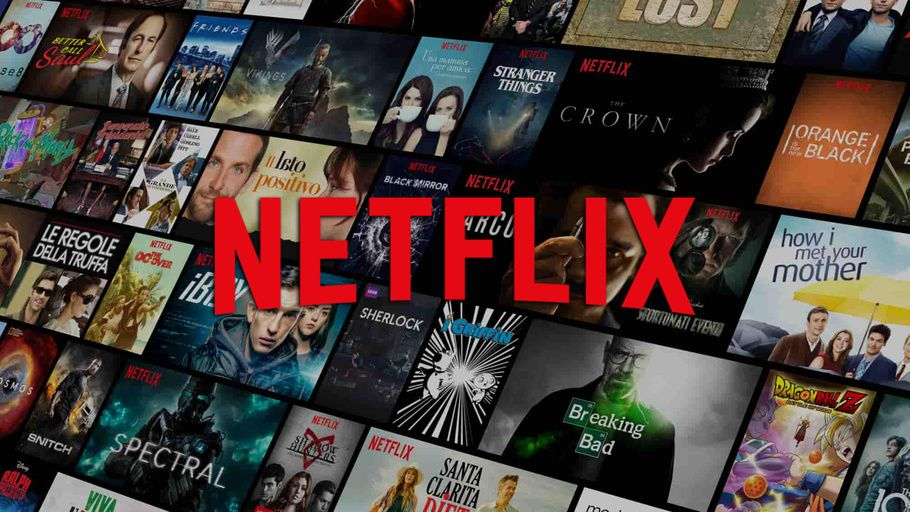

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Type of Netflix Content**

In [20]:
# Chart - 1 visualization code
x = df['type'].value_counts().reset_index()
colors=['DodgerBlue','red']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)))

##### 1. Why did you pick the specific chart?

To check types of netflix content.

##### 2. What is/are the insight(s) found from the chart?


* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most.

#### Chart - 2

**Country where the movie / show was most produced**

In [21]:
# Chart - 2 visualization code
country = df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 5)))
fig.show()

##### 1. Why did you pick the specific chart?

To check Country where the movie / show was most produced.

##### 2. What is/are the insight(s) found from the chart?

Clearly United states leads the chart followed by India and U.K.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide to release in which country to make more profit.

#### Chart - 3

**Total Releases for Last 10 Years**

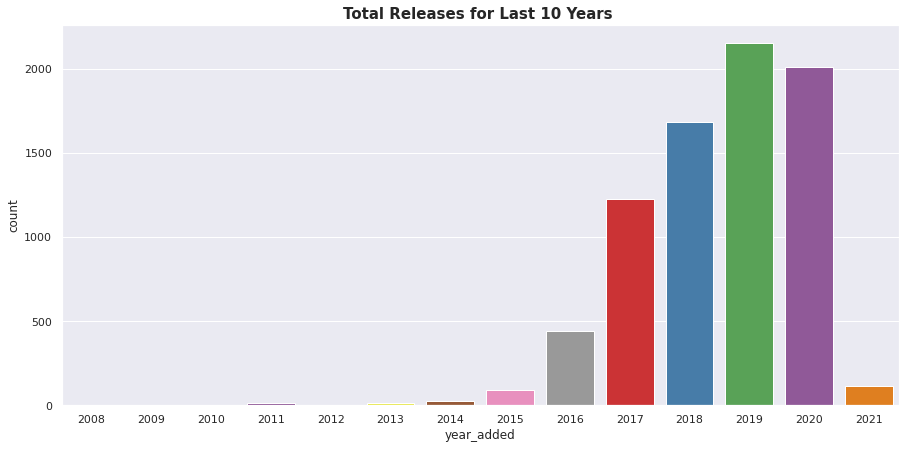

In [22]:
# Chart - 3 visualization code
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check the total Releases for Last 10 Years.

##### 2. What is/are the insight(s) found from the chart?

The number of releases have significantly increased after 2015 and have dropped in 2021 becase of Corona situation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is just to check which year how many contents released.

#### Chart - 4

**Releases of Movies month-wise**

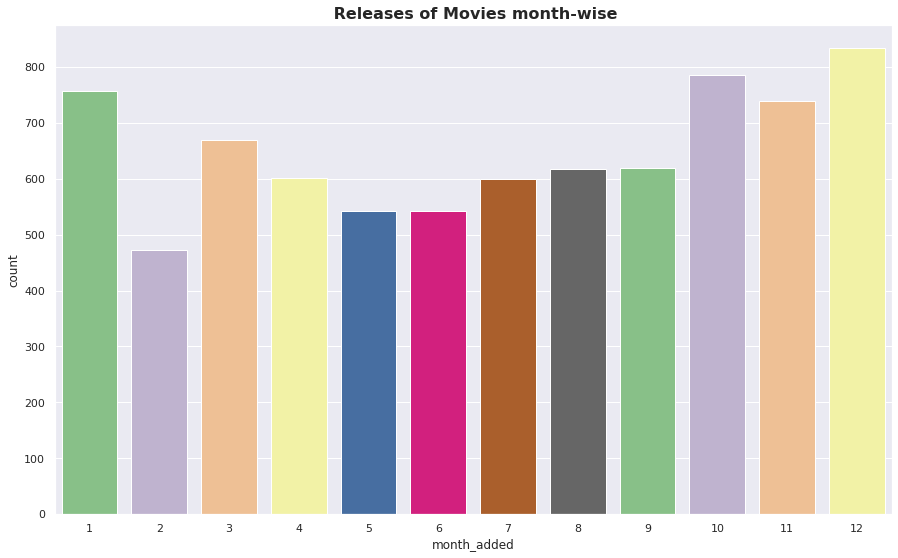

In [23]:
# Chart - 4 visualization code

sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check Releases of Movies month-wise.

##### 2. What is/are the insight(s) found from the chart?

As we can see more of the content is released in the months of October, November, December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which month to release to get more pofit and impact on audience.

#### Chart - 5

**Type and Ratings**

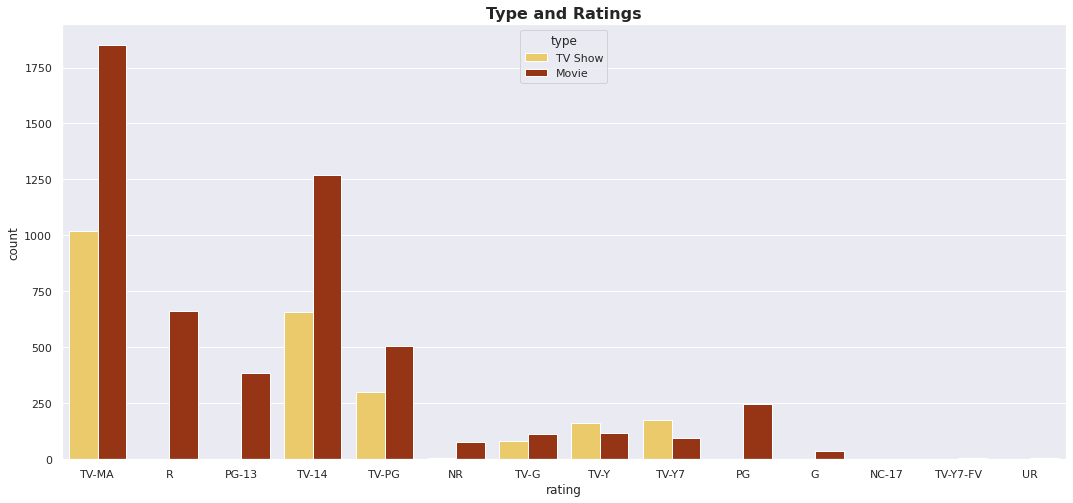

In [24]:
# Chart - 5 visualization code
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="afmhot_r")
plt.title('Type and Ratings',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the types of shows and its ratings.

##### 2. What is/are the insight(s) found from the chart?

As you can see Tv mature audience got highest ratings for movies and also for shows. followed by R rated content for movies and kids tv shows for shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most for profit.

#### Chart - 6

**Top 10 Genre in Movies**

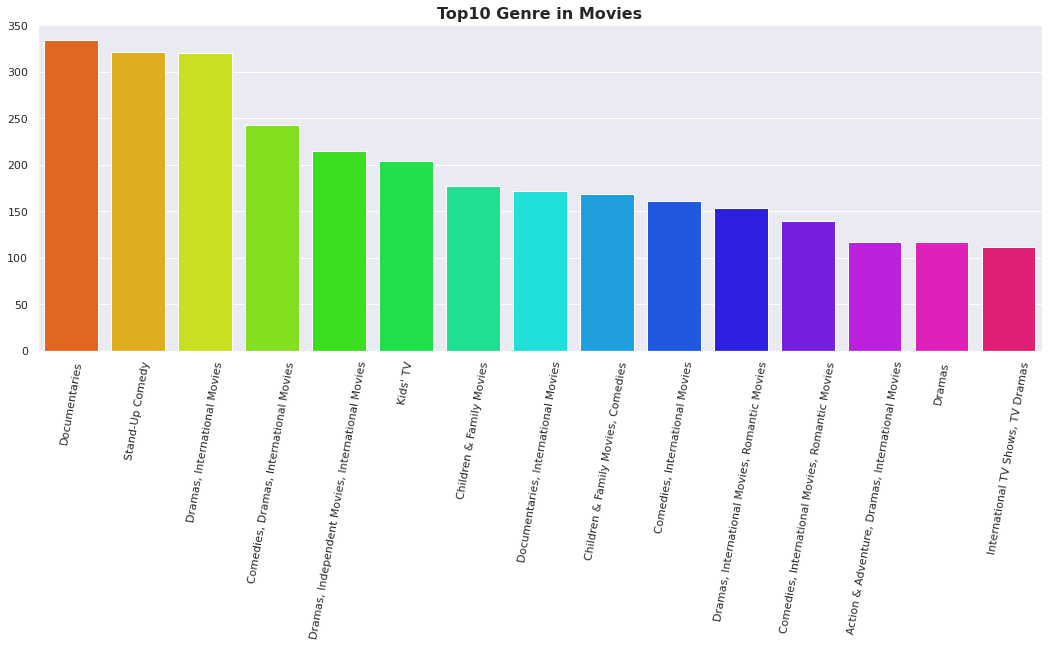

In [25]:
# Chart - 6 visualization code
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Top 10 Genre in Movies.

##### 2. What is/are the insight(s) found from the chart?

From the graph, we can tell that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which genre movies to make most.

**Here the Top 20 Genre in whole Netflix**

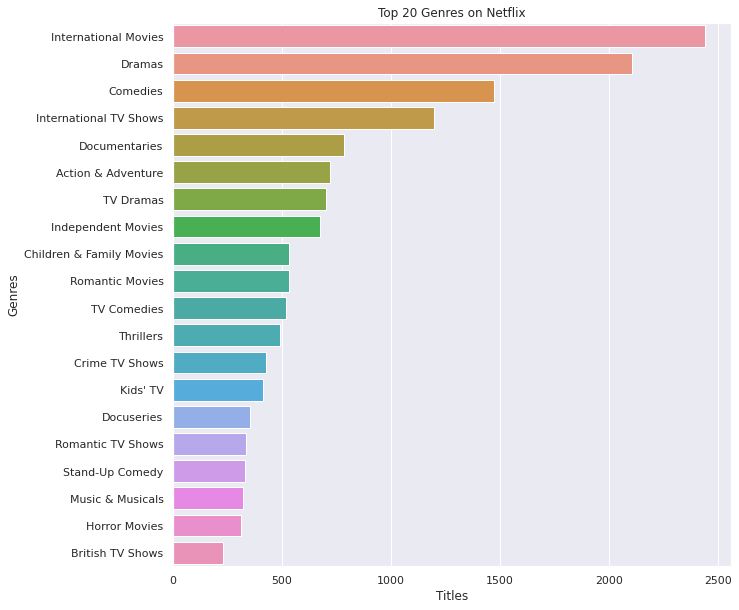

In [26]:
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 20 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**As you can see on whole Netflix genre, International movies dominated the list closely followed by Dramas and comedy.**

#### Chart - 7

**Top-10 ACTORS on Netflix**

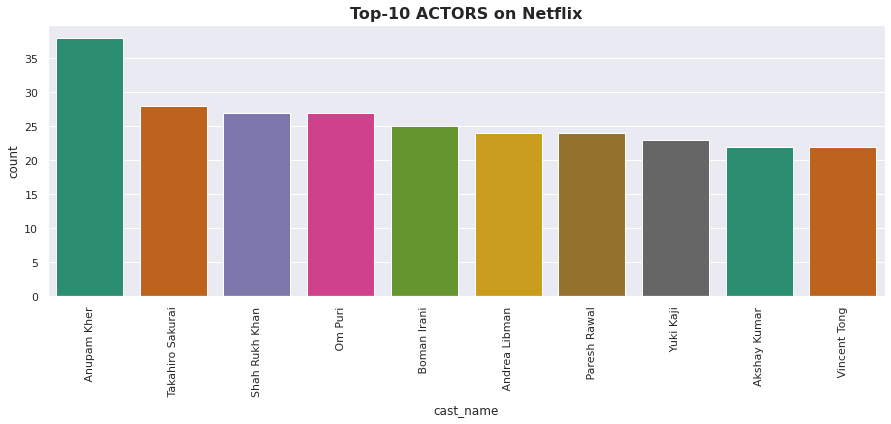

In [27]:
# Chart - 7 visualization code
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the the Top 10 ACTORS on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher followed by Takahiro Sakurai ans Shahrukh Khan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which actor to cast in movies or shows to get more audience.

#### Chart - 8
**Most occured word in the Title**

In [28]:
#Importing WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

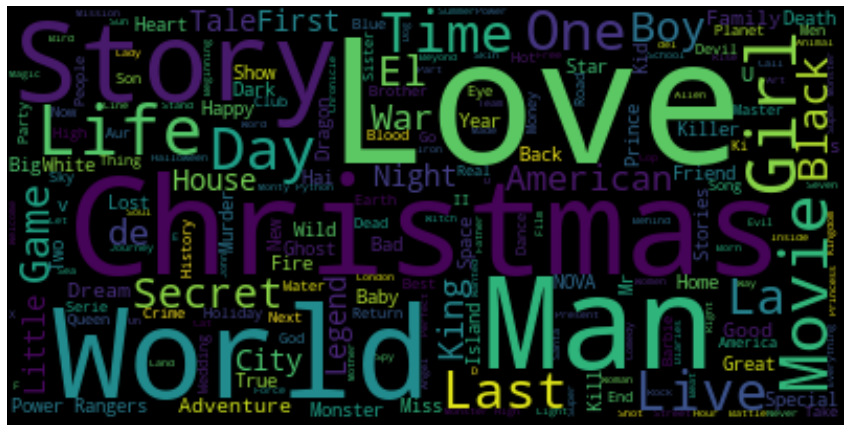

In [29]:
# Chart - 8 visualization code

df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

To check the most occured word in Title.

##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

#### Chart - 9

**Movie Duration distribution**

In [30]:
movie_duration = df.loc[df['type'] == 'Movie',['type','duration']]               
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))

Text(0.5, 1.0, 'Movie Duration')

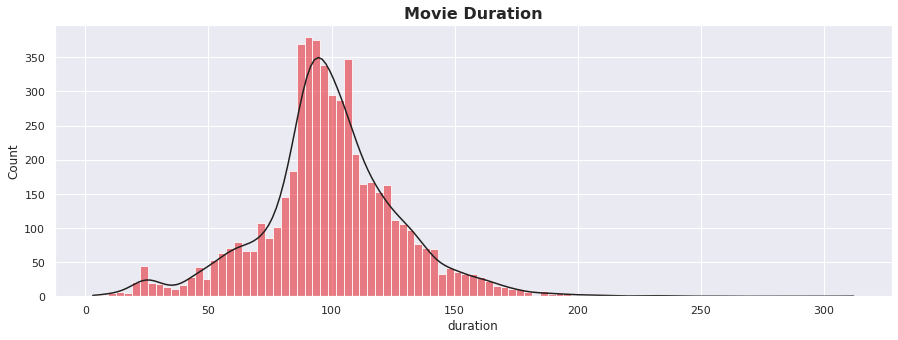

In [31]:
# Chart - 9 visualization code
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")


##### 1. Why did you pick the specific chart?

To check the movie duration time.

##### 2. What is/are the insight(s) found from the chart?

* Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.

* Most content are about 70 to 120 min duration for movies

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide what time duration most movies should be to attract more audience.

#### Chart - 10

In [32]:
# Chart - 10 visualization code

In [33]:
direct=df.copy()
#removing unknown 
direct=direct[df['director']!='Unknown']

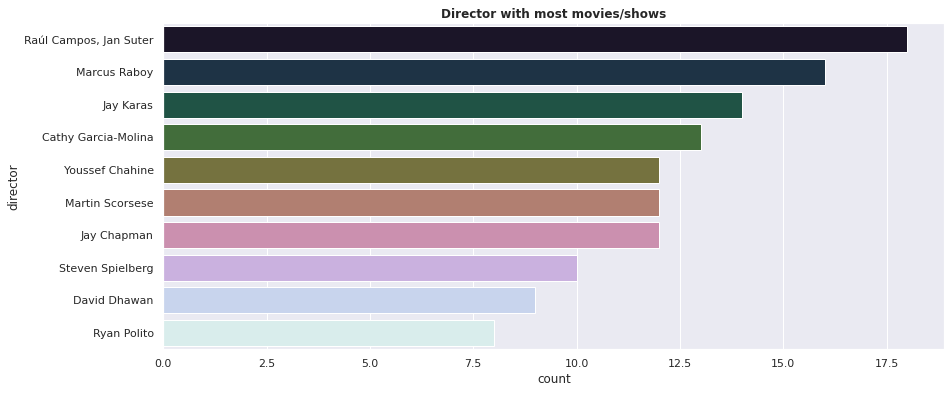

In [34]:
# Top 10 director whose content is available in netflix

plt.figure(figsize = (14,6))
sns.countplot(y='director',data=direct, order=direct['director'].value_counts().head(10).index,palette='cubehelix')
plt.title('Director with most movies/shows',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Director with most movies/shows.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter collectively have the most content on Netflix followed by Marcus and Jay respectivly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it will help us to choose the directors who have made more impactful shows or movies.

#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization

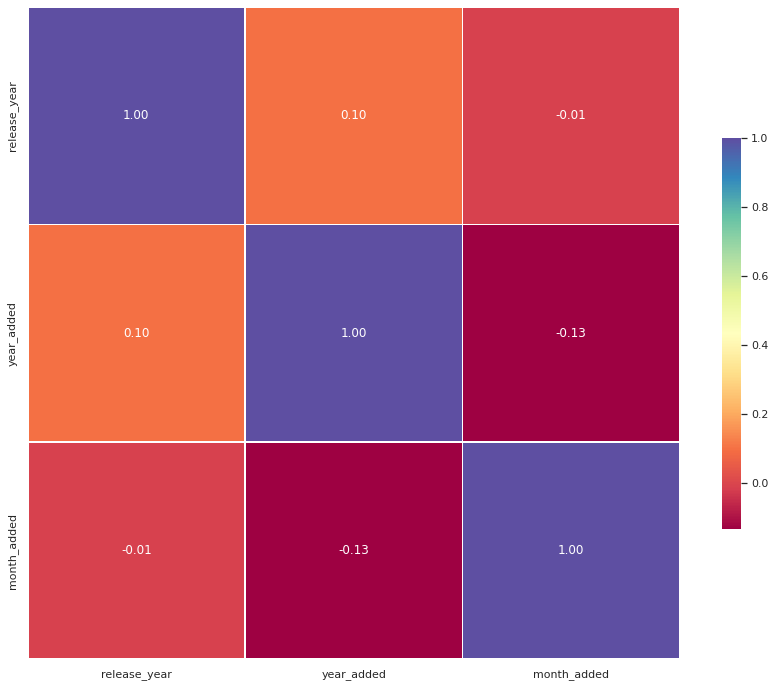

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

**Most of the columns of the dataset are of string type so those are not possible to plot a Correlation heatmap.**

#### Chart - 15 - Pair Plot 

In [37]:
# Pair Plot visualization code


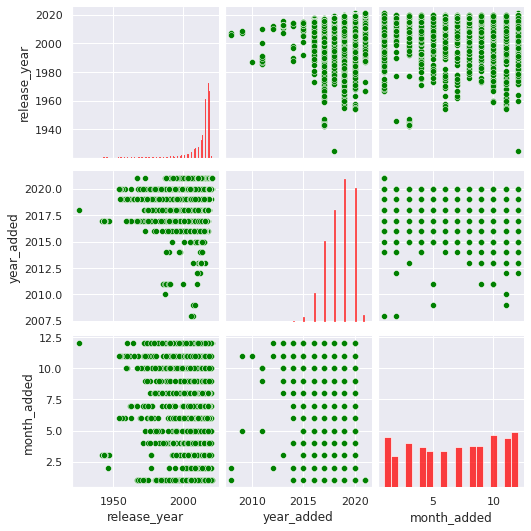

In [38]:
sns.pairplot(df,diag_kws={'color':'red'},plot_kws={'color':'green'})

**Most of the columns of the dataset are of string type so those are not possible to plot a Pair Plot.**

## ***5. Hypothesis Testing***

###Hypothetical Statement - 1

Here we will test that is there any relation between the year(year_added) of that content added with the type of the content(type).


* **Null Hypothesis:** year_added has no impact on type of content that getss added to the platform.

* **Alternative Hypothesis**: year_added has impact on type of content that gets added to the platform.

In [54]:
hypo_data = pd.crosstab(df['type'], df['year_added'], margins=False)
hypo_data

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,258,864,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,185,361,430,656,697,29


In [55]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [58]:
p

8.635372719955464e-11

Here we can see the p-value is greater than 0.05, so we can reject null hypothesis. 
So we can conclude that there is a impact of year_added on the type of content.

### Hypothetical Statement - 2

**The average duration of Movies released on Netflix is 90 min.**





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis: N = 90**


**Alternate Hypothesis : N != 90**

In [39]:
# For Hypothesis
from scipy.stats import *
import math


In [40]:
# Parameter class

class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [41]:
#Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value



def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [43]:
# Conclusion about P-value

def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis."
  else:
    return f"Null Hypothesis rejected "

In [44]:

# Initializing the class
findz = findz()

**2. Perform an appropriate statistical test**

In [45]:
# Perform Statistical Test to obtain P-Value

hypo = df["duration"].str.extract('(\d+)').rename(columns={0:"duration"})

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo["duration"].mean()

size = len(hypo["duration"])

std = (variance(pd.to_numeric(hypo["duration"])))**0.5

In [46]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='d')

# Getting Conclusion

print(conclusion(p))

Null Hypothesis rejected 


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis is rejected and The average duration of Movies released on Netflix is not 90 min.

##### Why did you choose the specific statistical test?

 **Z-Test** is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation
#Already handled.

### 2. Handling Outliers

In [97]:
# Handling Outliers & Outlier treatments

**There aren't any outliers in the dataset as the column datatypes are of string format.**

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# creating tags column using all text column which one is used for model building purpose.
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']

In [49]:
# checking the first row
df['text_data'][0]

'UnknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Removing Punctuations

In [50]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [51]:
# applying remove_punctuation function
df['text_data'] = df['text_data'].apply(remove_punctuation)
     

In [52]:
# checking the first row after the process
df['text_data'][0]

'UnknownJoão Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazilTVMAInternational TV Shows TV Dramas TV SciFi  FantasyIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 3. Removing Stopwords & Removing White spaces

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [60]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [61]:
# applying stopwords function.
df['text_data'] = df['text_data'].apply(stopwords)

In [62]:
# checking the first row again
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 4. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [63]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [64]:
# appying stemming function
df['text_data'] = df['text_data'].apply(stemming)

In [65]:
# checking the first row after the process
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

#### 5. Text Vectorization

In [66]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [67]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [68]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I used the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency.

It transforms the text data into numerical data which can be easily processed by machine learning algorithms. 

### 4. Dimesionality Reduction

In [69]:
# DImensionality Reduction (If needed)

In [70]:
from sklearn.decomposition import PCA

In [71]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

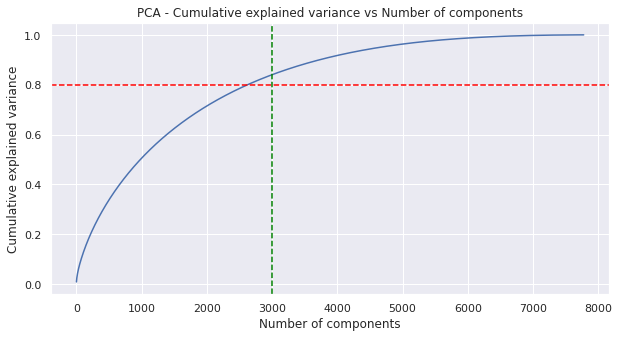

In [72]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.

* 3000 components alone account for more than 80% of the variance.

* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [73]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [74]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7777, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) to reduce the dimensionality of data.

Because It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

 $\color{red}{\text{K-Means Clustering}}$

 $\color{green}{\text{Elbow Method}}$

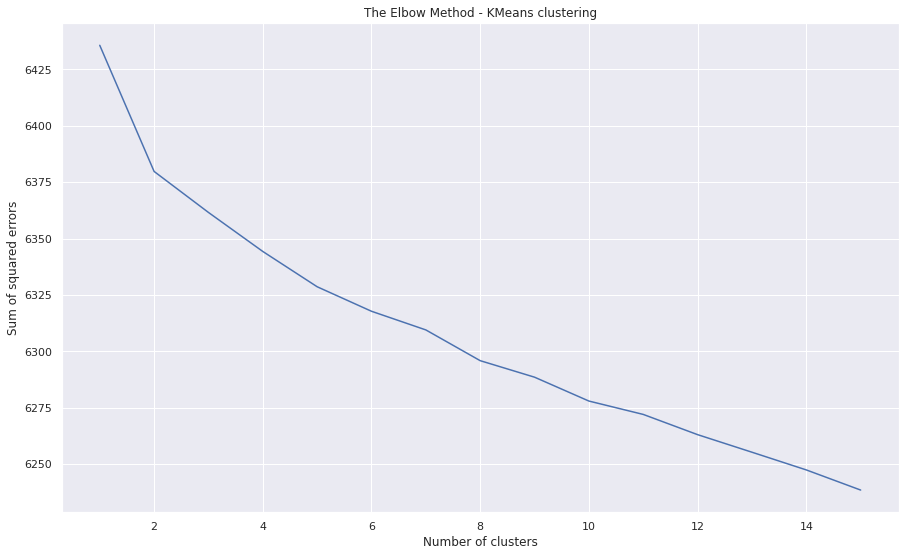

In [75]:
from sklearn.cluster import KMeans
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

 $\color{green}{\text{Silhouette Score}}$

In [76]:
from sklearn.metrics import silhouette_score

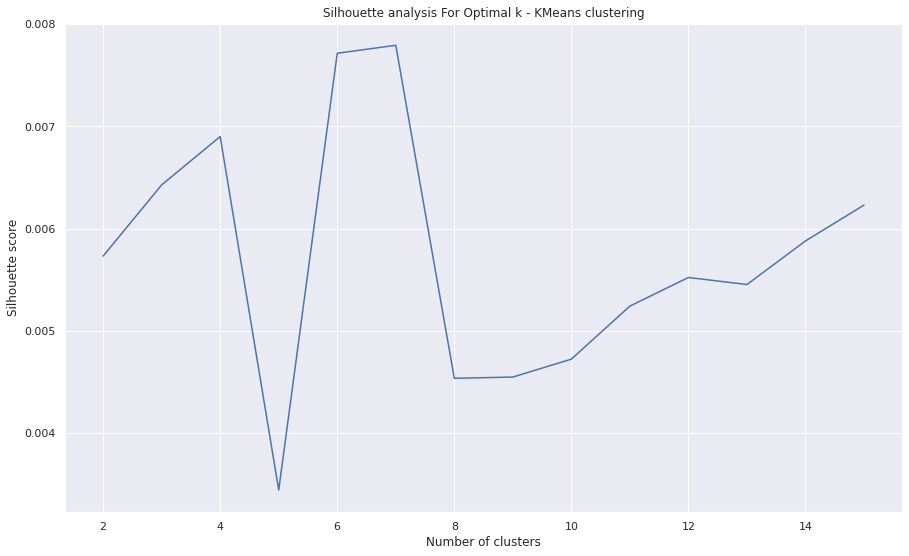

In [77]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [78]:
# Adding a kmeans cluster number attribute
df['clusters'] = kmeans.labels_

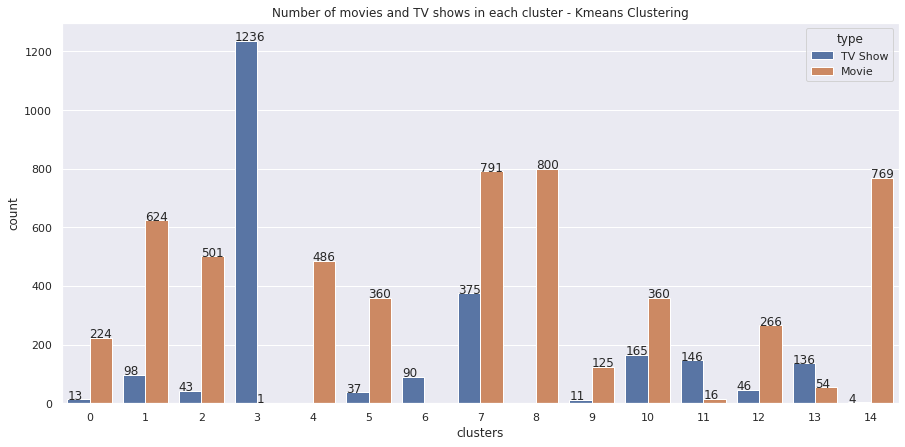

In [79]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,7))
graph = sns.countplot(x='clusters',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**Dendogram**

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

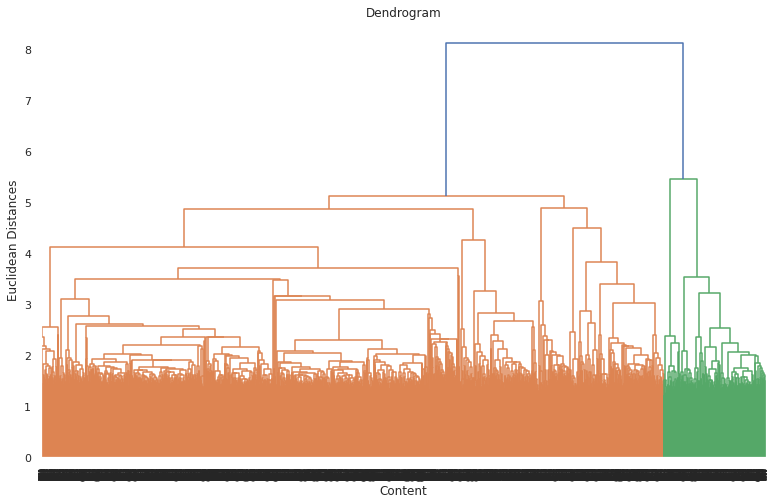

In [80]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70,color='r', linestyle='--')
plt.show()                                # find largest vertical distance we can make without crossing any other horizontal line
     

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster = 2** 






### ML Model - 2



 $\color{red}{\text{Agglomerative Clustering}}$


In [86]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

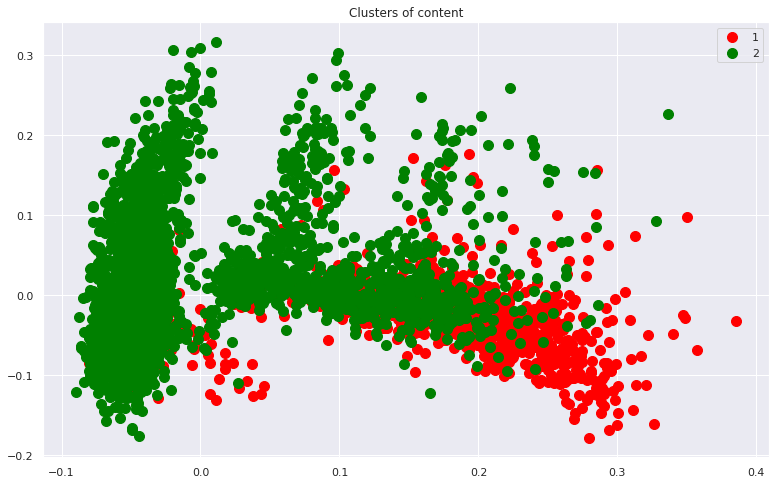

In [87]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = '2')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [88]:
np.unique(y_hc,return_counts=True)

(array([0, 1]), array([1094, 6683]))

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model



 $\color{red}{\text{Recommendation System}}$

In [89]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'description']]

,show_id,title,description
0,s1,3%,In a future where the elite inhabit an island ...
1,s2,7:19,After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"When an army recruit is found dead, his fellow..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,A brilliant group of students become card-coun...
...,...,...,...
7772,s7783,Zozo,When Lebanon's Civil War deprives Zozo of his ...
7773,s7784,Zubaan,A scrappy but poor boy worms his way into a ty...
7774,s7785,Zulu Man in Japan,"In this documentary, South African rapper Nast..."
7775,s7786,Zumbo's Just Desserts,Dessert wizard Adriano Zumbo looks for the nex...


In [91]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08469703,  0.02081349, ..., -0.0198339 ,
         0.01359728, -0.01747264],
       [ 0.08469703,  1.        , -0.00524675, ...,  0.0684012 ,
        -0.00948995, -0.01096327],
       [ 0.02081349, -0.00524675,  1.        , ..., -0.00306333,
        -0.01248415, -0.01596307],
       ...,
       [-0.0198339 ,  0.0684012 , -0.00306333, ...,  1.        ,
        -0.00572064,  0.20004005],
       [ 0.01359728, -0.00948995, -0.01248415, ..., -0.00572064,
         1.        ,  0.04367707],
       [-0.01747264, -0.01096327, -0.01596307, ...,  0.20004005,
         0.04367707,  1.        ]])

In [93]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [94]:
recommend('Happy New Year')

If you liked 'Happy New Year', you may also enjoy: 

Om Shanti Om
Chennai Express
Main Hoon Na
Dance Academy
Bbuddah Hoga Terra Baap
Don
Kabhi Alvida Naa Kehna
Don 2
Kung Fu Yoga
Aarakshan


In [95]:
recommend('The Witcher')

If you liked 'The Witcher', you may also enjoy: 

The Witcher: A Look Inside the Episodes
Making The Witcher
Love & Anarchy
The Day Will Come
Ripper Street
Oh No! It's an Alien Invasion
A.D. Kingdom and Empire
Mohawk
Clash of the Titans
Schitt's Creek


In [96]:
recommend('Inception')

If you liked 'Inception', you may also enjoy: 

Apollo 18
Peaky Blinders
Æon Flux
Solomon Kane
Aamir
Cabins in the Wild with Dick Strawbridge
Dead in a Week (Or Your Money Back)
Dragonheart
The Titan
Lionheart


In [98]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
Hormones
Servant of the People
W/ Bob & David
The Underclass
Time Share
21 Thunder
The School Nurse Files
Answer for Heaven
The Bad Kids


**So its a Success.**

# **Conclusion**

**1. It was interesting to find that majority of the content available on Netflix is Movies.**

**2. But in the recent years it has been focusing more on Tv-Shows.**


**3. United States and India are among the top 5 countries that produce all of the available content on the platform.**

**4. Also 6 of the actors among the top ten actors with maximum content are from India.**

**5. TV-MA tops the charts, indicating that mature content is more popular on Netflix.**


**6.By applying different clustering models like Kmeans, Agglomerative clustering on dataset we got the best cluster arrangements i.e optimal number of cluster is equal to 3 .**

**7. A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched or searched.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***